In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')
sns.set
plt.style.use('ggplot')
%matplotlib inline

In [34]:
df=pd.read_csv("liver disease.csv")

In [8]:
df.head()

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
#target column is dataset
#Supervised or Unsupervised
#Classification
#binary

In [10]:
df.shape

(615, 13)

In [12]:
df.columns

Index(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase', 'protein'],
      dtype='object')

In [14]:
df.describe()

,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [ ]:
#EDA

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   category                    615 non-null    object 
 1   age                         615 non-null    int64  
 2   sex                         615 non-null    object 
 3   albumin                     614 non-null    float64
 4   alkaline_phosphatase        597 non-null    float64
 5   alanine_aminotransferase    614 non-null    float64
 6   aspartate_aminotransferase  615 non-null    float64
 7   bilirubin                   615 non-null    float64
 8   cholinesterase              615 non-null    float64
 9   cholesterol                 605 non-null    float64
 10  creatinina                  615 non-null    float64
 11  gamma_glutamyl_transferase  615 non-null    float64
 12  protein                     614 non-null    float64
dtypes: float64(10), int64(1), object(2)

In [16]:
df.dtypes[df.dtypes=='object']

category    object
sex         object
dtype: object

Distribution of numerical feature

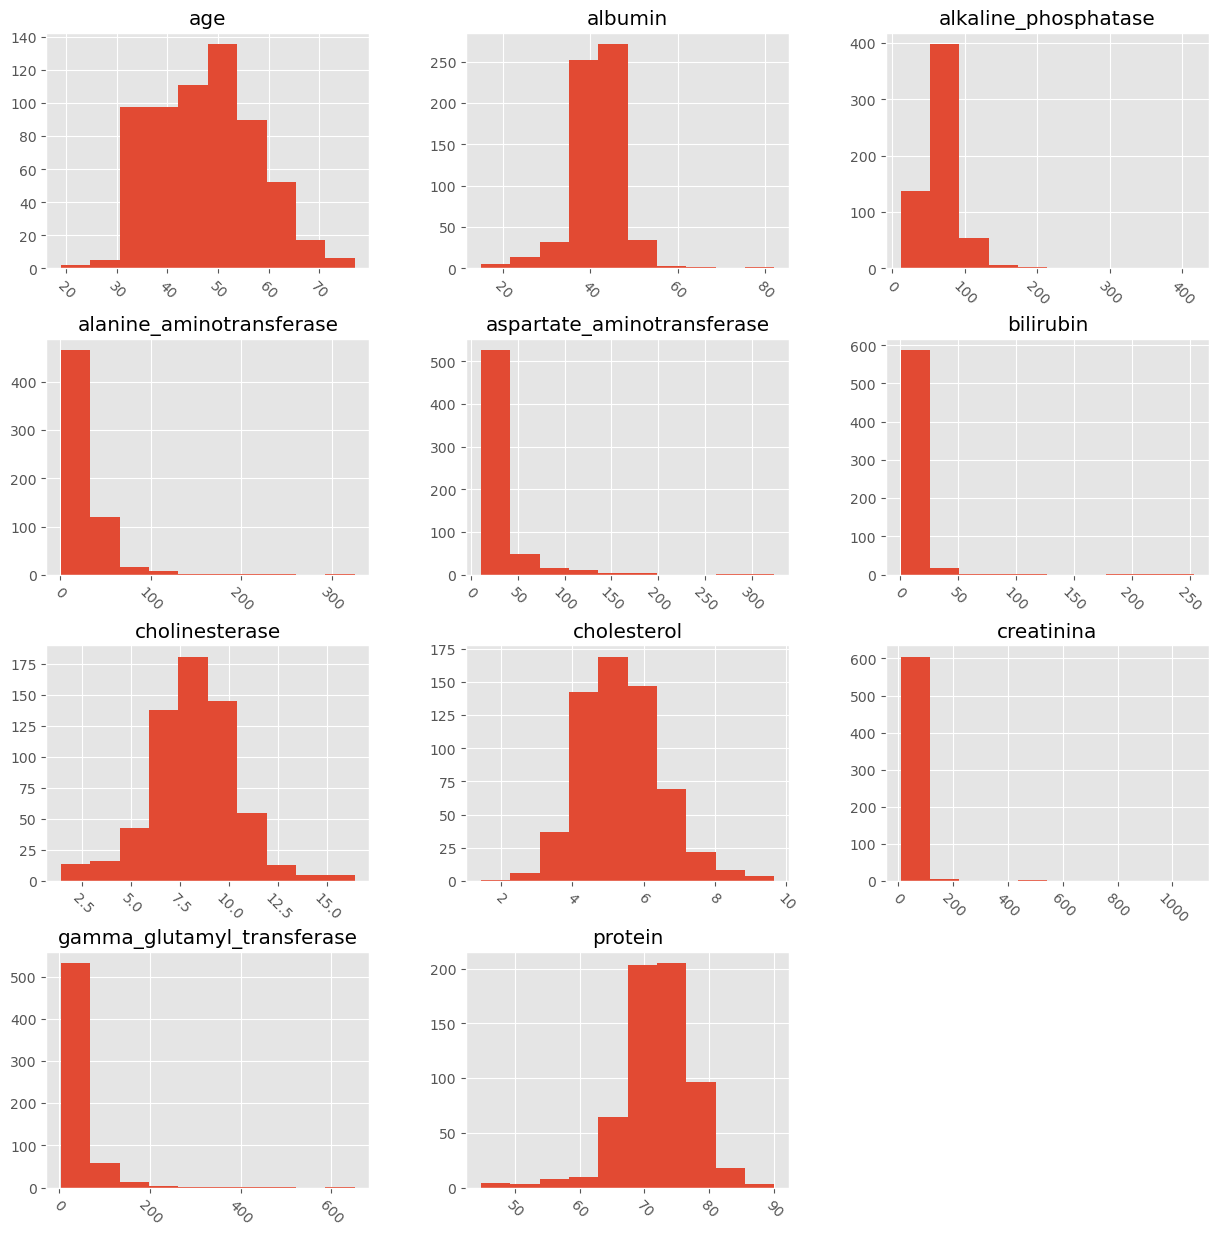

In [40]:
df.hist(figsize=(15,15),xrot=-45,bins=10)
plt.show()

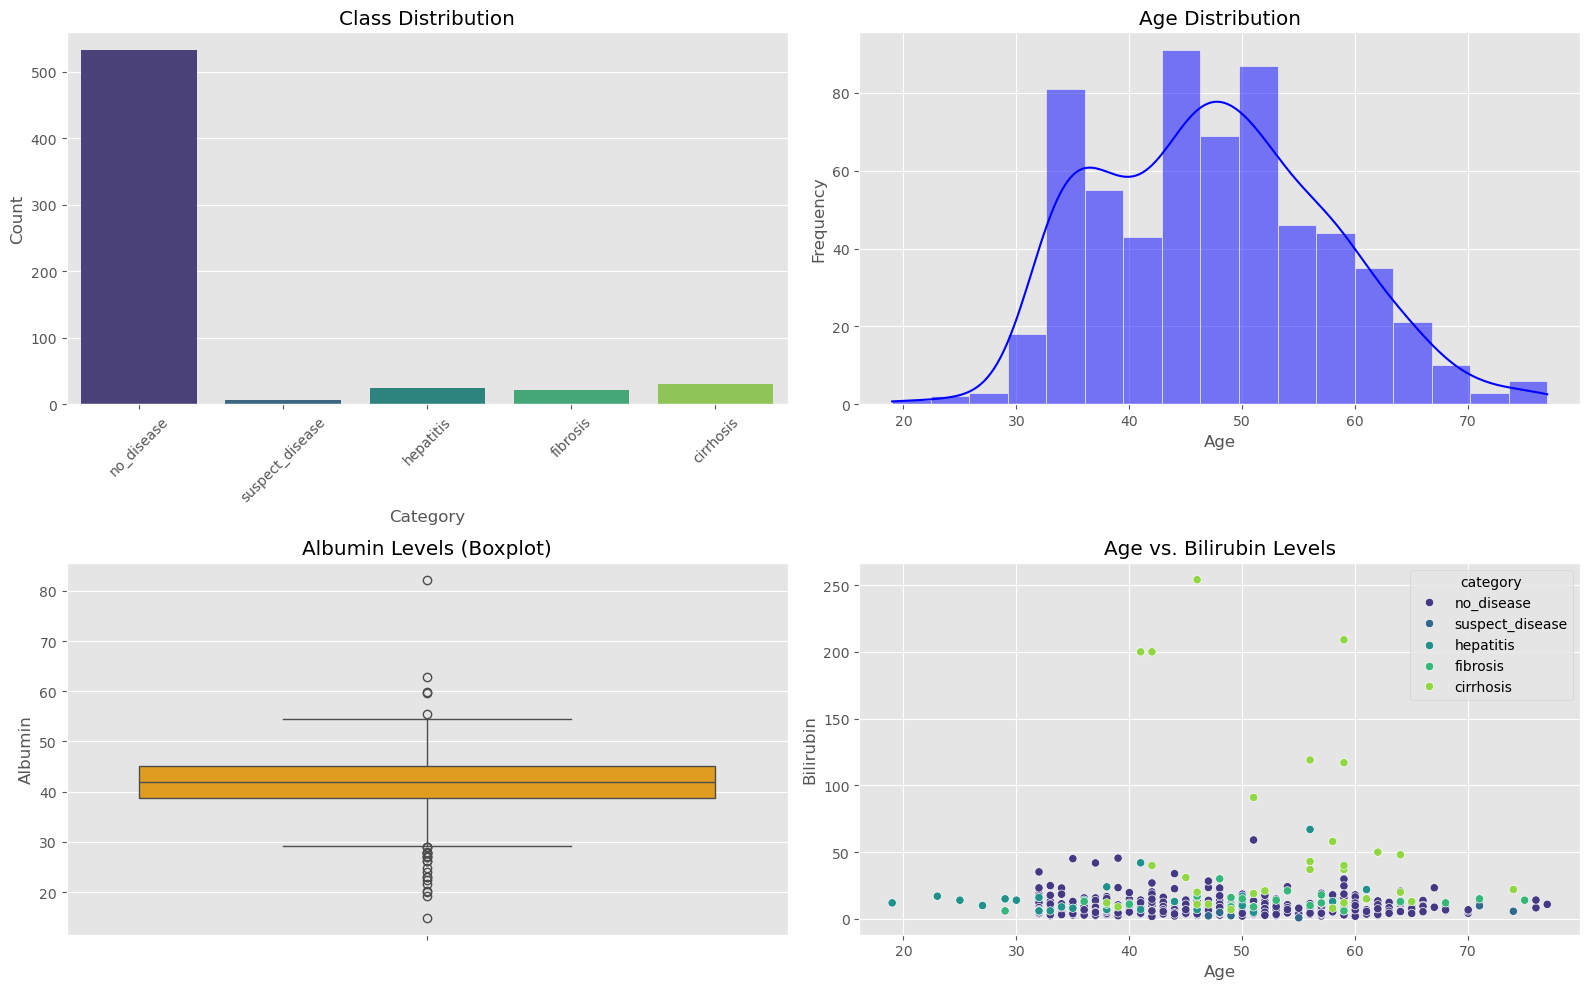

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualizations
plt.figure(figsize=(16, 10))

# Distribution of target variable
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='category', palette='viridis')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')

# Age distribution
plt.subplot(2, 2, 2)
sns.histplot(df['age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Albumin distribution (with missing values removed)
plt.subplot(2, 2, 3)
sns.boxplot(data=df, y='albumin', color='orange')
plt.title('Albumin Levels (Boxplot)')
plt.ylabel('Albumin')

# Relationship: Age vs. Bilirubin
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='age', y='bilirubin', hue='category', palette='viridis')
plt.title('Age vs. Bilirubin Levels')
plt.xlabel('Age')
plt.ylabel('Bilirubin')

plt.tight_layout()
plt.show()


In [42]:
df.describe()

,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [44]:
df.describe(include=['object'])

,category,sex
count,615,615
unique,5,2
top,no_disease,m
freq,533,377


In [ ]:
#Bar plot for  categorical features

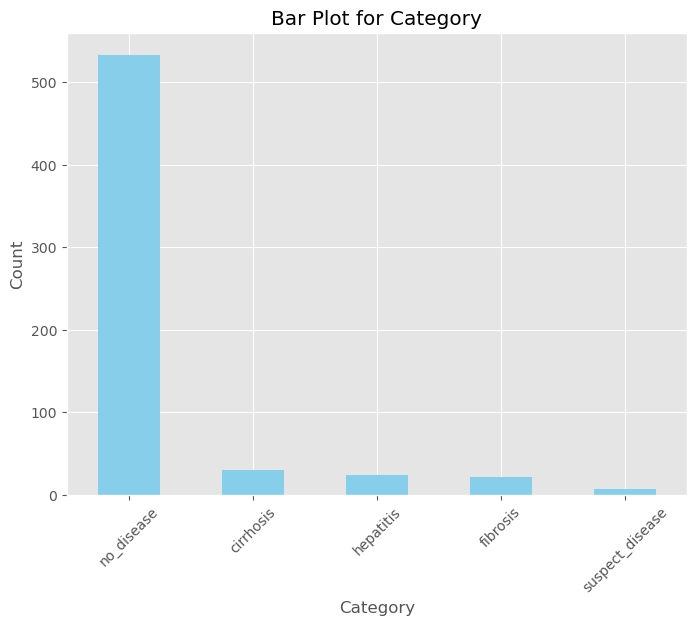

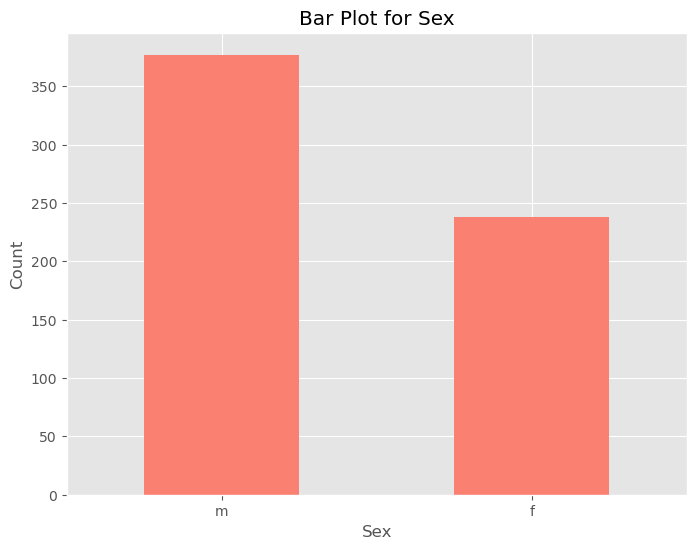

In [46]:
# Bar plot for 'category'
df['category'].value_counts().plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.title('Bar Plot for Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Bar plot for 'sex'
df['sex'].value_counts().plot(kind='bar', figsize=(8, 6), color='salmon')
plt.title('Bar Plot for Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


<Figure size 500x500 with 0 Axes>

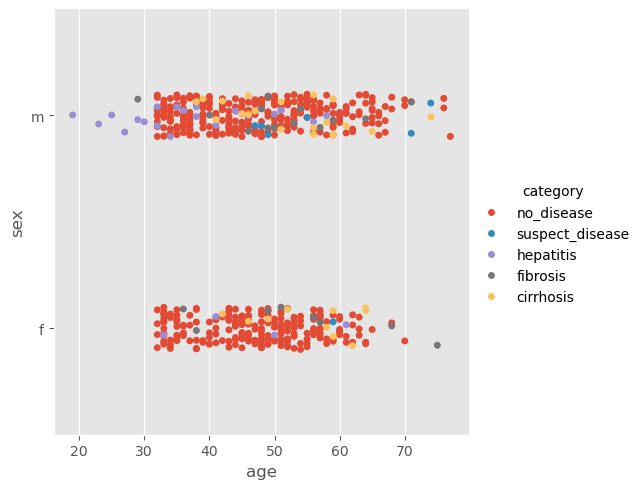

In [58]:
sns.catplot(x="age", y="sex", hue="category", data=df, kind="strip")
plt.show()


In [60]:
df['sex'].value_counts(0)

sex
m    377
f    238
Name: count, dtype: int64

In [62]:
df['category'].value_counts(0)

category
no_disease         533
cirrhosis           30
hepatitis           24
fibrosis            21
suspect_disease      7
Name: count, dtype: int64

In [ ]:
# 1. Handle missing values

In [84]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
imputer = SimpleImputer(strategy='median')
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

In [92]:
# Check for missing values in the first few rows
print(df.head())


     category   age sex  albumin  alkaline_phosphatase  \
0  no_disease  32.0   m     38.5                  52.5   
1  no_disease  32.0   m     38.5                  70.3   
2  no_disease  32.0   m     46.9                  74.7   
3  no_disease  32.0   m     43.2                  52.0   
4  no_disease  32.0   m     39.2                  74.1   

   alanine_aminotransferase  aspartate_aminotransferase  bilirubin  \
0                       7.7                        22.1        7.5   
1                      18.0                        24.7        3.9   
2                      36.2                        52.6        6.1   
3                      30.6                        22.6       18.9   
4                      32.6                        24.8        9.6   

   cholinesterase  cholesterol  creatinina  gamma_glutamyl_transferase  \
0            6.93         3.23       106.0                        12.1   
1           11.17         4.80        74.0                        15.6   
2       

In [88]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [ ]:
#Categorical Value Handling

In [96]:
from sklearn.preprocessing import LabelEncoder

# Encode 'sex'
label_encoder_sex = LabelEncoder()
df['sex'] = label_encoder_sex.fit_transform(df['sex'])

# Encode 'category'
label_encoder_category = LabelEncoder()
df['category'] = label_encoder_category.fit_transform(df['category'])


In [102]:
from sklearn.preprocessing import StandardScaler

# Standardize numeric columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [106]:
print(df.head())
print(df.info())


   category       age  sex   albumin  alkaline_phosphatase  \
0         3 -1.533616    1 -0.540739             -0.613566   
1         3 -1.533616    1 -0.540739              0.081055   
2         3 -1.533616    1  0.914755              0.252759   
3         3 -1.533616    1  0.273645             -0.633077   
4         3 -1.533616    1 -0.419448              0.229345   

   alanine_aminotransferase  aspartate_aminotransferase  bilirubin  \
0                 -0.815675                   -0.383693  -0.198236   
1                 -0.410629                   -0.305057  -0.381375   
2                  0.305084                    0.538767  -0.269457   
3                  0.084865                   -0.368571   0.381706   
4                  0.163515                   -0.302033  -0.091404   

   cholinesterase  cholesterol  creatinina  gamma_glutamyl_transferase  \
0       -0.574734    -1.903634    0.497070                   -0.502286   
1        1.349161    -0.505077   -0.146590                

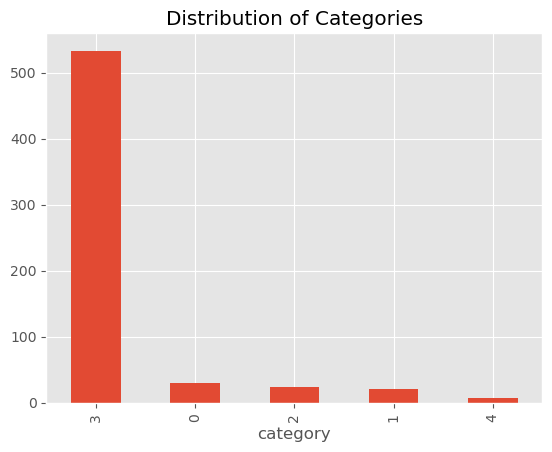

In [108]:
df['category'].value_counts().plot(kind='bar')
plt.title('Distribution of Categories')
plt.show()


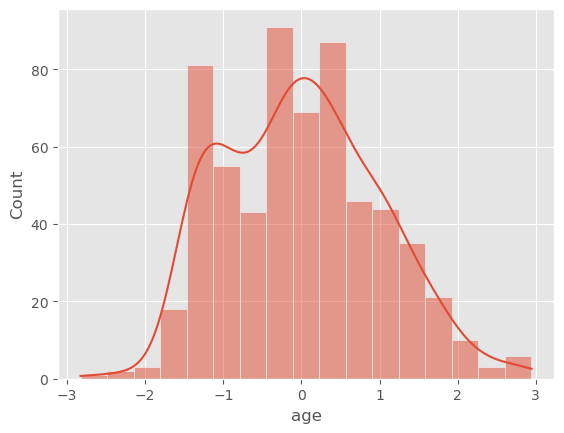

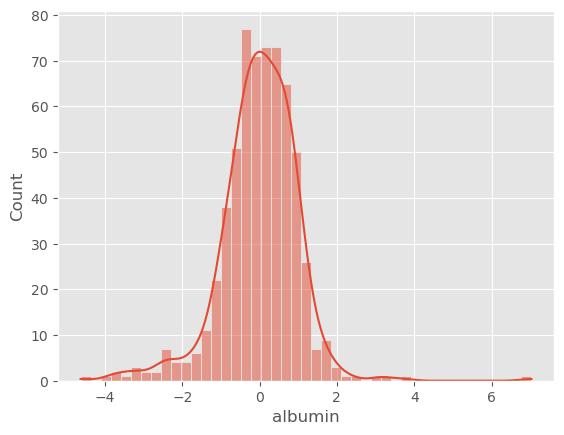

In [110]:
sns.histplot(df['age'], kde=True)
plt.show()
sns.histplot(df['albumin'], kde=True)
plt.show()


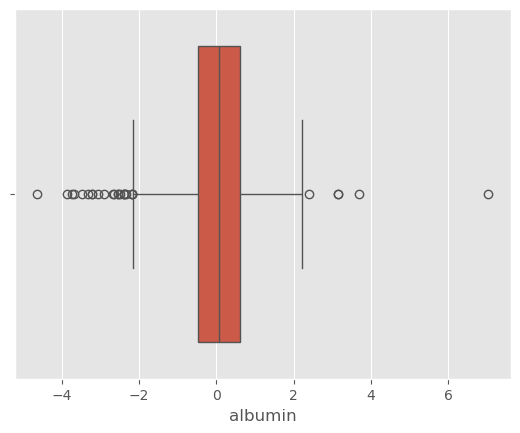

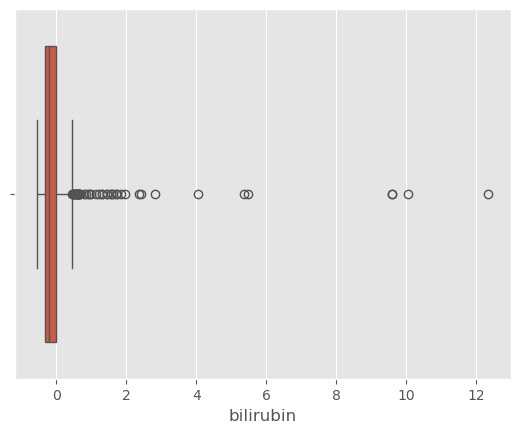

In [112]:
sns.boxplot(x=df['albumin'])
plt.show()
sns.boxplot(x=df['bilirubin'])
plt.show()


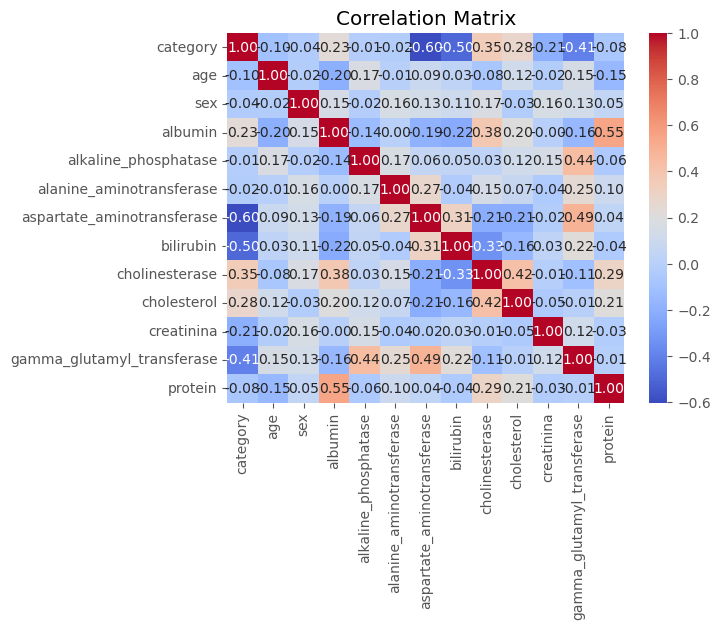

In [114]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


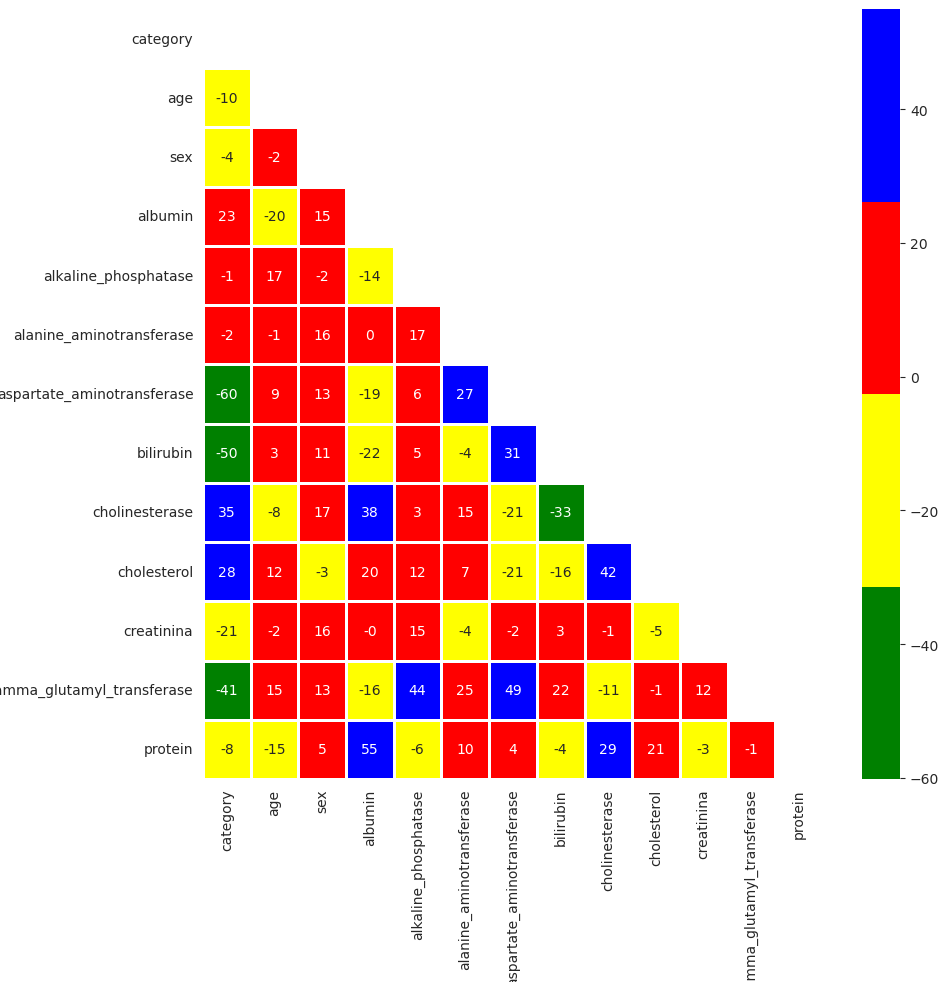

In [135]:
# Generate mask for the upper triangle
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

# Create the heatmap
plt.figure(figsize=(10, 10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr() * 100, mask=mask, fmt=".0f", annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red', 'blue']))

# Display the plot
plt.show()


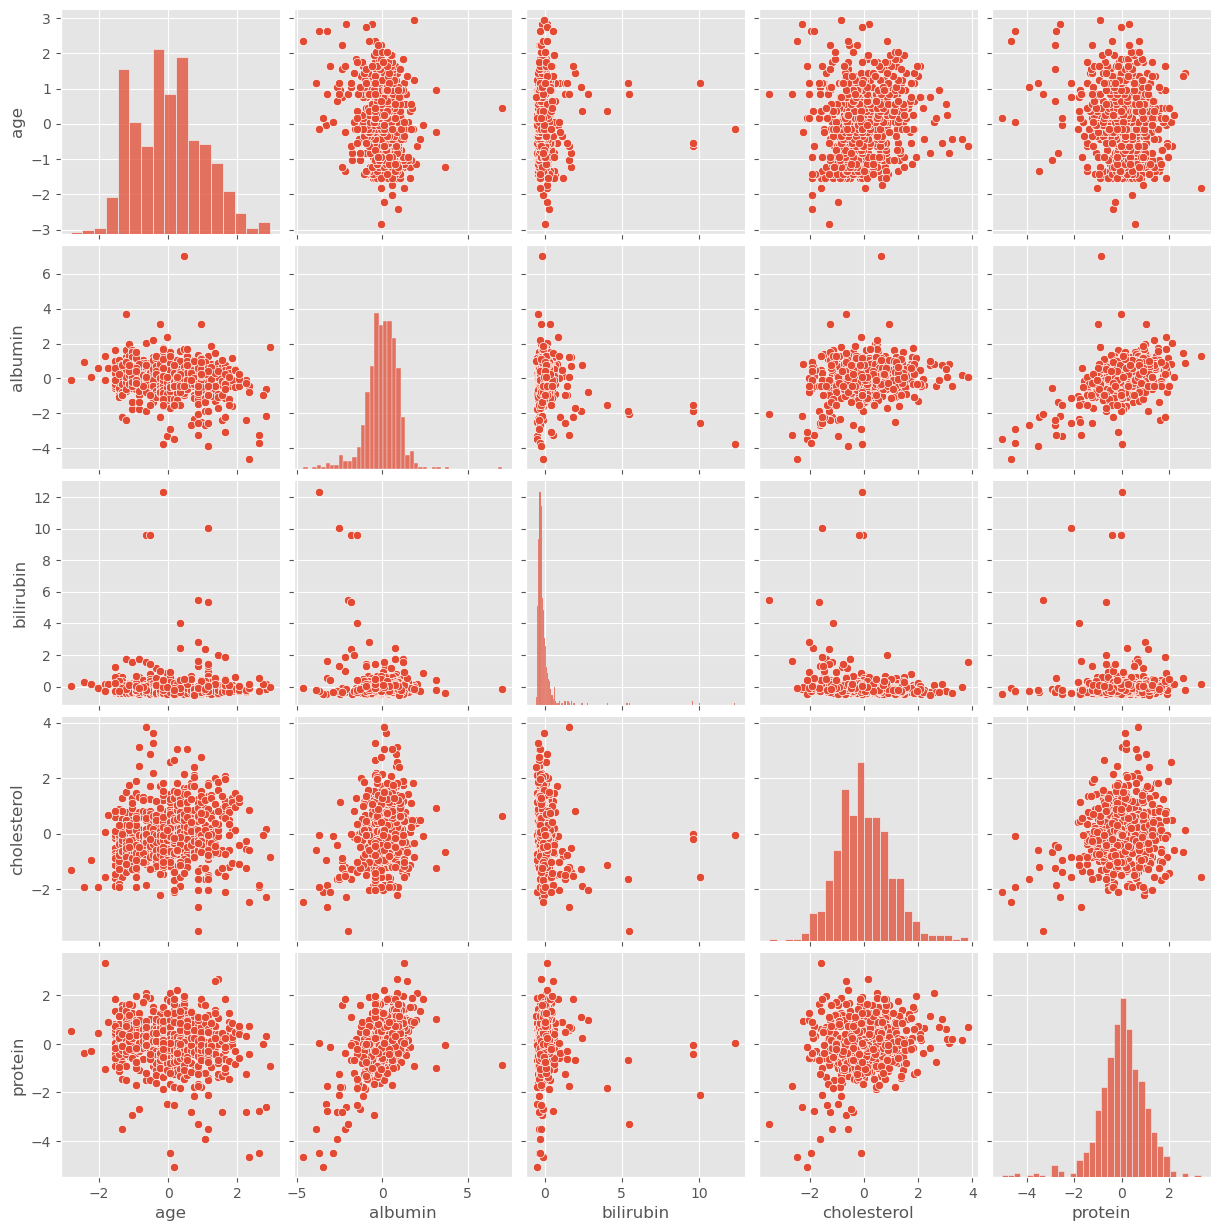

In [116]:
sns.pairplot(df[['age', 'albumin', 'bilirubin', 'cholesterol', 'protein']])
plt.show()


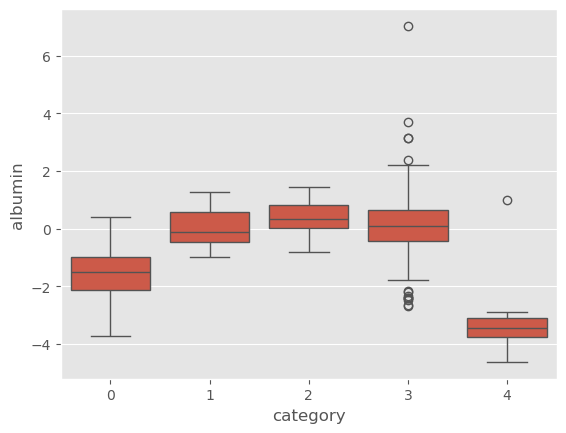

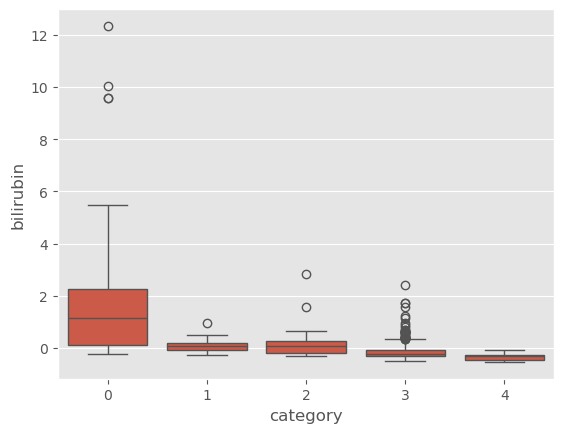

In [118]:
sns.boxplot(x=df['category'], y=df['albumin'])
plt.show()
sns.boxplot(x=df['category'], y=df['bilirubin'])
plt.show()


In [120]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# Step 1: Identify and remove outliers
z_scores = zscore(df[['age', 'albumin', 'bilirubin']])
df_no_outliers = df[(abs(z_scores) < 3).all(axis=1)]

# Step 2: Apply Standardization (or scaling)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_no_outliers[['age', 'albumin', 'bilirubin']])


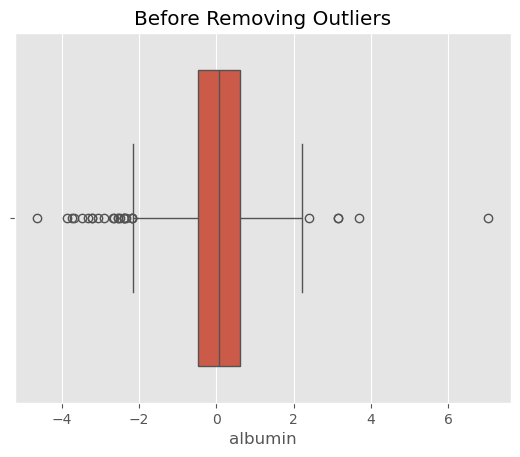

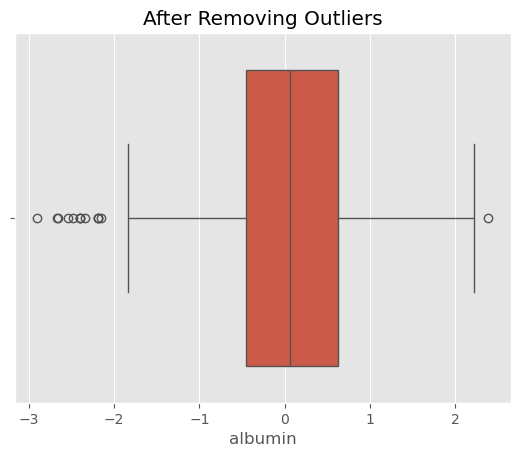

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Before removing outliers (original data)
sns.boxplot(x=df['albumin'])
plt.title('Before Removing Outliers')
plt.show()

# After removing outliers
sns.boxplot(x=df_no_outliers['albumin'])
plt.title('After Removing Outliers')
plt.show()


In [124]:
print(f"Number of rows before: {len(df)}")
print(f"Number of rows after: {len(df_no_outliers)}")


Number of rows before: 615
Number of rows after: 596


In [126]:
from sklearn.preprocessing import StandardScaler

# Step 1: Apply Standardization (Z-score scaling) after removing outliers
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_no_outliers[['age', 'albumin', 'bilirubin', 'cholesterol', 'creatinina']])

# Convert back to DataFrame for easier readability
df_scaled = pd.DataFrame(scaled_features, columns=['age', 'albumin', 'bilirubin', 'cholesterol', 'creatinina'])
